In [44]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

In [45]:
dstock = pd.read_csv("Dhaka.csv")

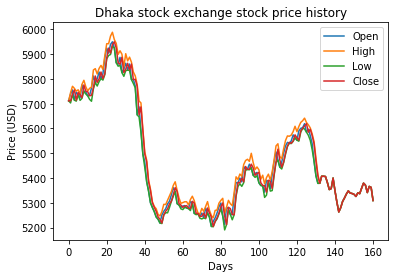

In [46]:
plt.figure()
plt.plot(dstock["Open"])
plt.plot(dstock["High"])
plt.plot(dstock["Low"])
plt.plot(dstock["Price"])
plt.title('Dhaka stock exchange stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper right')
plt.show()

In [47]:
dstock['Date'] = pd.to_datetime(dstock['Date'])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
y = dstock.iloc[:, 2]

In [50]:
x = dstock.iloc[:,-3:] #feature variable : all colunm after price

In [51]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=908)

In [52]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(X_train)

In [54]:
tesing_set_scaled = scaler.fit_transform(X_test)

In [55]:
X_train = training_set_scaled[:-1]
y_train = training_set_scaled[1:]
X_test = tesing_set_scaled[:-1]
y_test = tesing_set_scaled[1:]

In [59]:
nn_model = Sequential()
nn_model.add(Dense(17, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

ValueError: Error when checking input: expected dense_19_input to have shape (1,) but got array with shape (3,)